/home/liang/miniconda3/envs/cfd/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


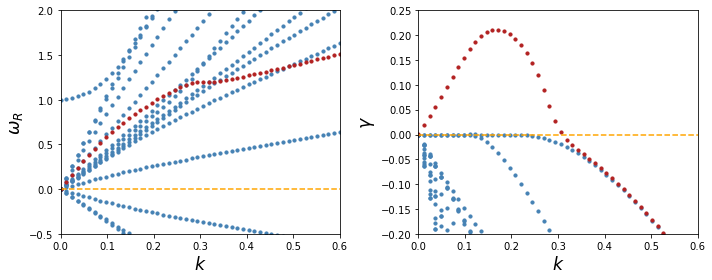

In [1]:
"""
DEMO: Bump-on-tail instability
"""

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.labelsize'] = 'xx-large'

import sys
sys.path.append('../../')
import xenon

# parameters of each plasma species
species = np.array([
    # q, m, n,   v,     p
    [-1, 1, 0.9, 0,     0.9],  # background electrons
    [-1, 1, 0.1, 7.071, 0.1],  # beam electrons
])
params = dict(epsilon0=1)  # other parameters
J = 8  # order of Pade approximation
ks = np.linspace(0.0001, 0.6, 50)  # an array of wavenumbers
# for each wavenumber, compute the complex frequencies
ws = xenon.vlasov.k2w_es1d(ks, species, params, J=J, sort='imag')

# plot the dispersion relations and sort the results by the
# imaginary parts, i.e., by the growth rates
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
# plot all modes but the fastest growing mode
xenon.common.plot_dr(
    ks,
    ws[:, :-1],
    ax0=axs[0],
    ax1=axs[1],
    pargs0=dict(c='steelblue', s=10),
    pargs1=dict(c='steelblue', s=10),
)
# plot the fastest growing mode
xenon.common.plot_dr(
    ks,
    ws[:, -1:],
    ax0=axs[0],
    ax1=axs[1],
    pargs0=dict(c='firebrick', s=10),
    pargs1=dict(c='firebrick', s=10),
)
# other adjustment
axs[0].axhline(0, ls='--', c='orange')
axs[1].axhline(0, ls='--', c='orange')
axs[1].set_ylim(-0.2, 0.25)
axs[0].set_ylim(-0.5, 2)
fig.tight_layout()
plt.show()